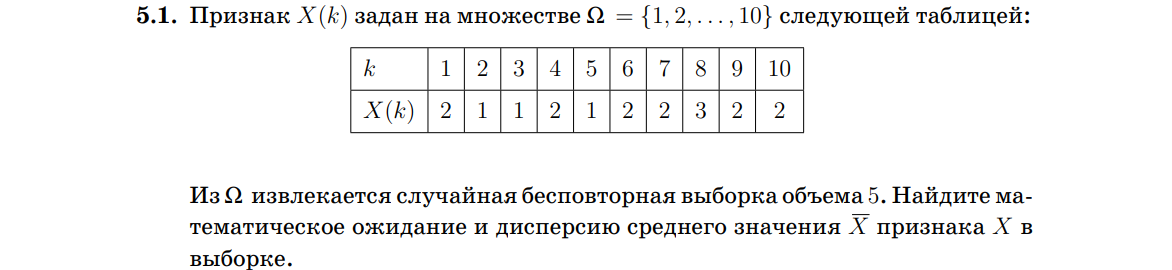

In [41]:
import numpy as np
from sympy import *

In [42]:
d = {1:2, 2:1, 3:1, 4:2, 5:1, 6:2, 7:2, 8:3, 9:2, 10:2}
sample = list(i for i in range(1,11))

In [43]:
s = np.random.choice(sample, size=5, replace=False)
lst = []
for x in s:
    lst.append(d[x])
s, lst

(array([1, 4, 5, 3, 8]), [2, 2, 1, 1, 3])

In [44]:
np.mean(lst)

1.8

In [45]:
n = 5
N = 10
np.var(lst)/n * ((N-n)/(N-1))

0.062222222222222234

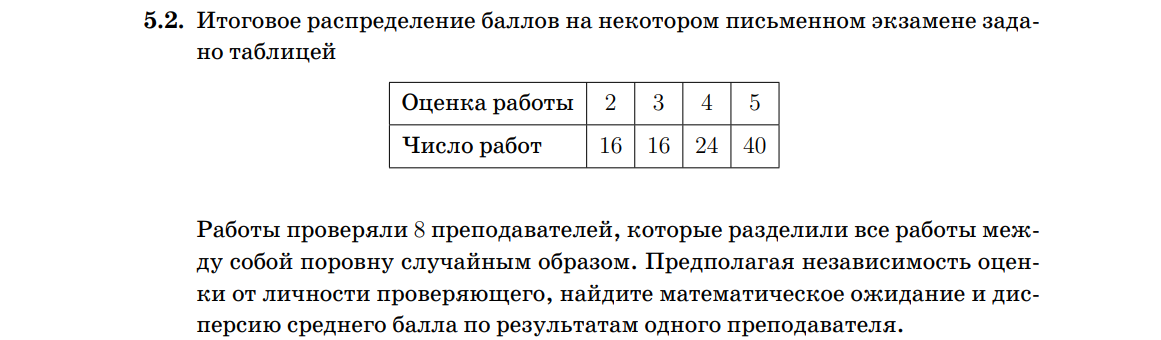

In [46]:
n = 16+16+24+40 # N
nk = n/8 # n
lst = [2]*16 + [3]*16 + [4]*24 + [5]*40
m = 0
v = 0
for i in range(10000):
    sample = np.random.choice(lst, size=12, replace=False)
    m += np.mean(sample)
v = np.var(lst)/nk * (n-nk)/(n-1)
m/10000, v

(3.9166416666666577, 0.09159356725146195)

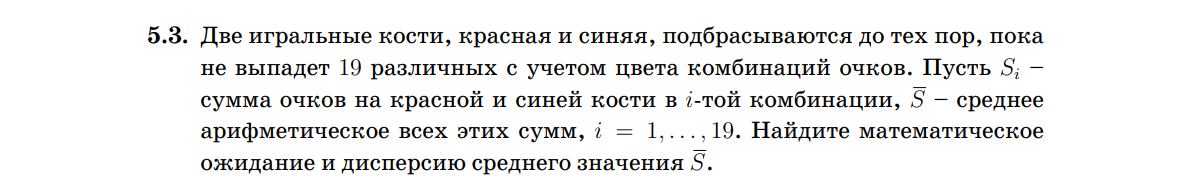

In [47]:
N = 36
n = 19
ES = 1/6*sum(range(1,7))*2
VarS = (N-n)/(N-1)/n * (1/6*sum(list(i**2 for i in range(1,7))) - (1/6*(sum(range(1,7))))**2) * 2
ES, VarS

(7.0, 0.14912280701754382)

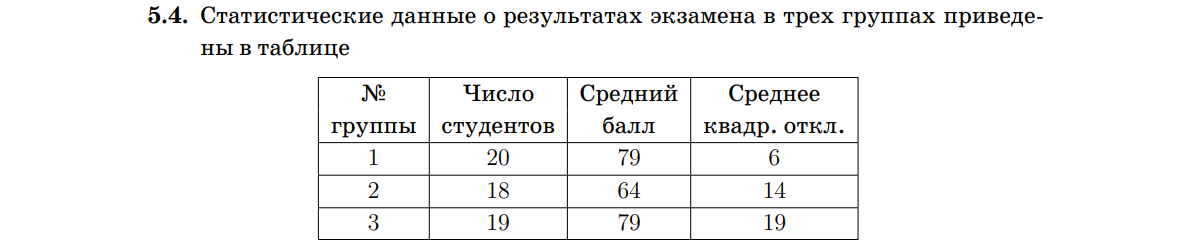

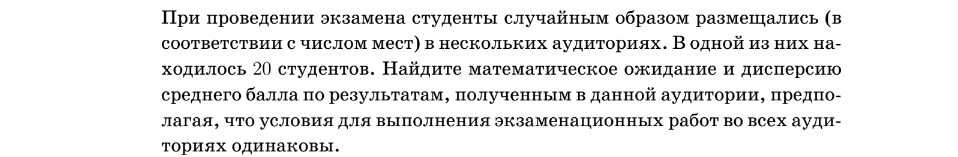

In [52]:
N = 20 + 18 + 19
n1, n2, n3 = 20, 18, 19
E = (20*79 + 18*64 + 19*79)/N
Var = 1/N * (n1*(79 - E)**2 + n2*(64 - E)**2 + n3*(79 - E)**2) # межгрупповая дисперсия
VarSr = (n1*6**2 + n2*14**2 + n3*19**2)/N 
VarOb = (Var + VarSr)
Varob1 = VarOb/n1 * (N-n1)/(N-1)
E, Varob1

(74.26315789473684, 8.043357571560481)

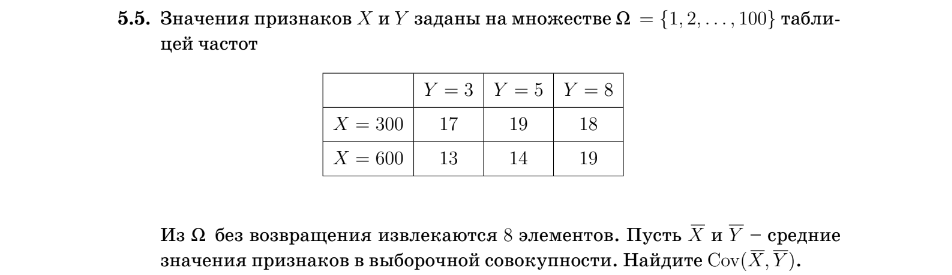

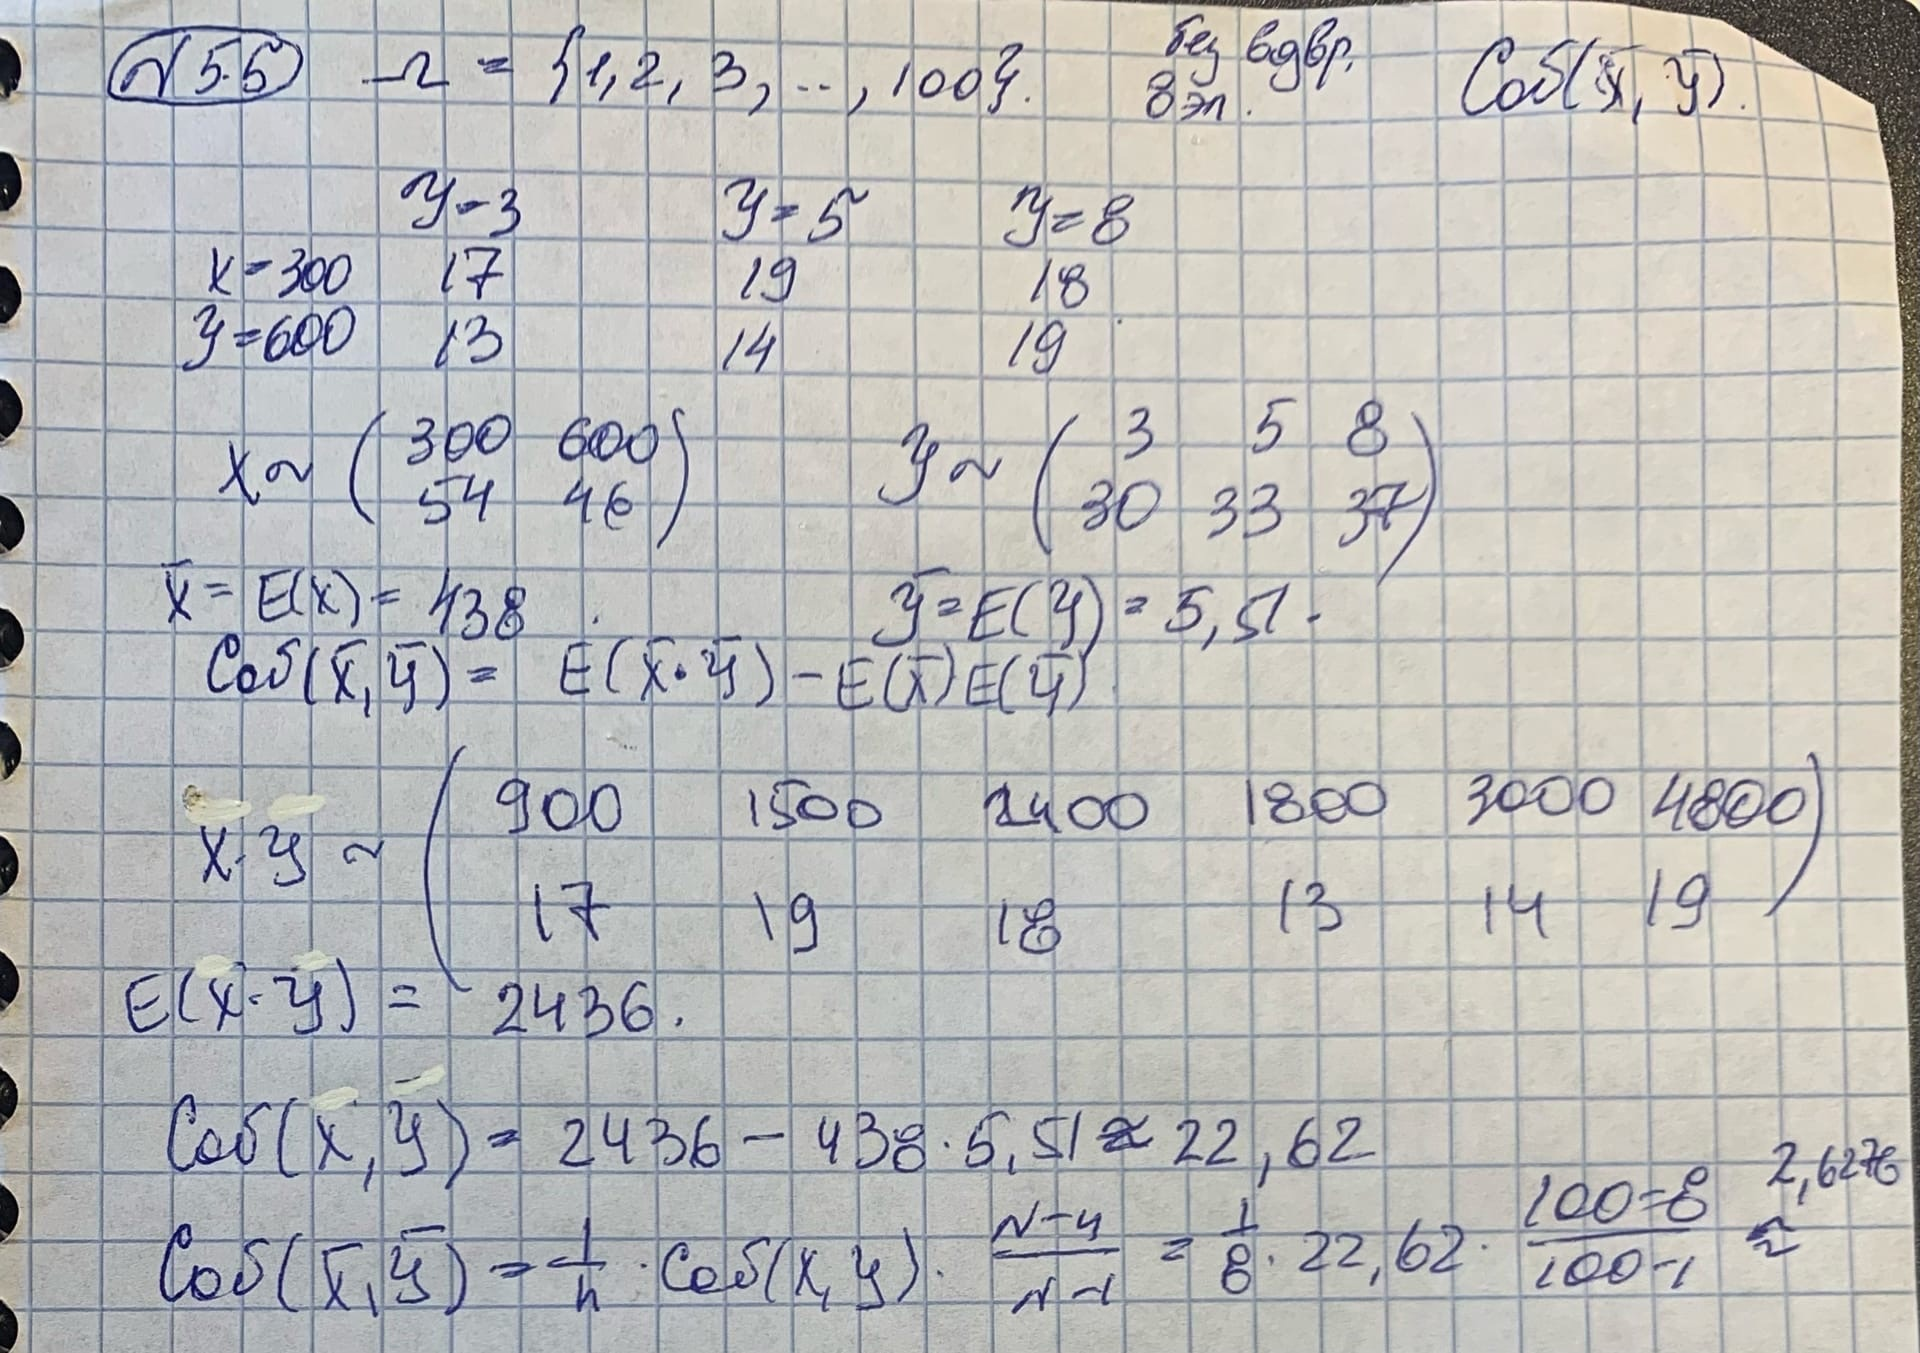

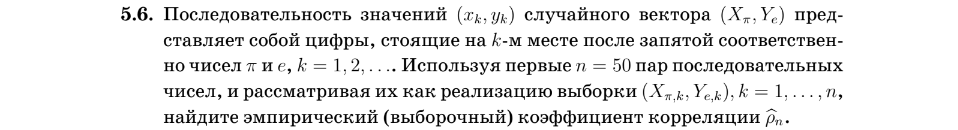

In [49]:
dec_e = np.array(list(map(int, format(np.e, '.50f')[2:])))
dec_pi = np.array(list(map(int, format(np.pi, '.50f')[2:])))
np.corrcoef(dec_e, dec_pi)[0][1]

0.1817518397608767

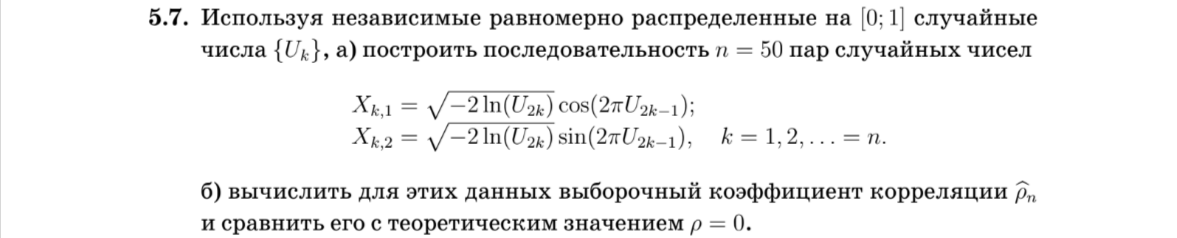

In [50]:
from scipy.stats import *
x = uniform(0,1)
sample = x.rvs(size=101)
X1, X2 = [], []
for i in range(1,51):
    X1.append((-2*ln(sample[i*2]))**0.5 * cos(2*np.pi*(sample[2*i-1])))
    X2.append((-2*ln(sample[i+1]))**0.5 * sin(2*np.pi*(sample[2*i-1])))

np.corrcoef(np.array(X1), np.array(X2), dtype=float)[0][1]

-0.12326242686844446

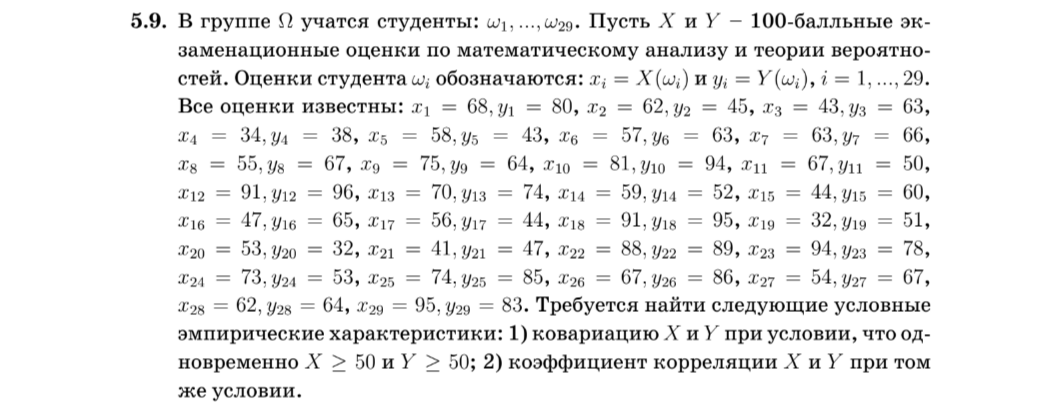

In [86]:
xy = '''x1 = 68, y1 = 80, x2 = 62, y2 = 45, x3 = 43, y3 = 63,
x4 = 34, y4 = 38, x5 = 58, y5 = 43, x6 = 57, y6 = 63, x7 = 63, y7 = 66,
x8 = 55, y8 = 67, x9 = 75, y9 = 64, x10 = 81, y10 = 94, x11 = 67, y11 = 50,
x12 = 91, y12 = 96, x13 = 70, y13 = 74, x14 = 59, y14 = 52, x15 = 44, y15 = 60,
x16 = 47, y16 = 65, x17 = 56, y17 = 44, x18 = 91, y18 = 95, x19 = 32, y19 = 51,
x20 = 53, y20 = 32, x21 = 41, y21 = 47, x22 = 88, y22 = 89, x23 = 94, y23 = 78,
x24 = 73, y24 = 53, x25 = 74, y25 = 85, x26 = 67, y26 = 86, x27 = 54, y27 = 67,
x28 = 62, y28 = 64, x29 = 95, y29 = 83'''.replace('\n', '').split(',')

In [95]:
lst = []
lx, ly = [], []
for i in range(len(xy)):
    lst.append(int(xy[i].split('=')[1].strip()))
for j in range(0,len(lst),2):
    if lst[j] >= 50 and lst[j+1] >= 50:
        lx.append(lst[j])
        ly.append(lst[j+1])
np.cov(np.array(lx), np.array(ly), bias=True)[0][1], np.corrcoef(np.array(lx), np.array(ly))[0][1]

(126.68421052631581, 0.6651397470340329)

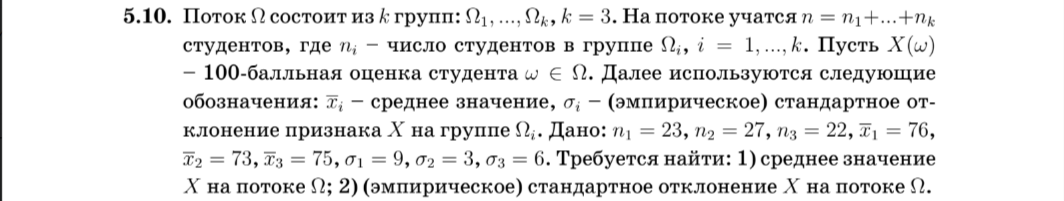

In [81]:
n1, n2, n3 = 23, 27, 22
x1s, x2s, x3s = 76, 73, 75
sgm1, sgm2, sgm3 = 9, 3, 6
Xs = (n1*x1s + n2*x2s + n3*x3s)/(n1+n2+n3)
sigma_m = 1/(n1+n2+n3) * (n1*(x1s - Xs)**2 + n2*(x2s - Xs)**2 + n3*(x3s - Xs)**2)
sigma_v = (n1*sgm1**2 + n2*sgm2**2 + n3*sgm3**2)/(n1+n2+n3)
sigma = (sigma_m + sigma_v)
stdot = sigma**(0.5)
Xs, stdot

(74.56944444444444, 6.471790042795323)

In [77]:
z1 = ((n1*(x1s - Xs)**2 + n2*(x2s - Xs)**2 + n3*(x3s - Xs)**2)/(n1+n2+n3))
z1

9.144375

In [78]:
z2 = (n1*sgm1**2 + n2*sgm2**2 + n3*sgm3**2)/(n1+n2+n3)
z2

40.5

In [79]:
z = (z1 + z2)
z

49.644375

In [80]:
z**.5

7.045876453642939